In [1]:
## This code toggles all code cells displaying on or off, so we can see output and markdown cells only.
## All code cells display can be toggled on/off.

# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
## Import all the things

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import pycountry

%matplotlib inline 

# This allows cells with long text values to wrap
pd.set_option('display.max_colwidth', -1)


pd.set_option('max_rows', 200)

In [3]:
# Setting up base maps 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # world map

# Set up function to add row/column totals to dataframes
def add_totals(df):
    df['row total'] = df.sum(axis=1)
    df = df.append(df.sum(axis=0).rename("column total"))
    return df


# The Carpentries: Programmatic Assessment Report
## January 1, 2012 through March 31, 2018

#### Authors: Maneesha Sane, Erin Becker


### What is The Carpentries?


Software Carpentry (SWC) and Data Carpentry (DC) are two programs of The Carpentries (a fiscally sponsored project of Community Initiatives). We teach essential computing and data skills. We exist because the skills needed to do computational, data-intensive research are not part of basic research training 
in most disciplines.

### About Software Carpentry     

Software Carpentry enables researchers to create purpose-built tools, whether it be a Unix shell script to automate 
repetitive tasks, or software code in programming languages such as Python, R, or MATLAB. 
These enable researchers to build programs that can be read, re-used, and validated, greatly enhancing the 
sharing and reproducibility of their research.    

### About Data Carpentry

Data Carpentry learners are taught to work with data more effectively. Workshops focus on the data lifecycle, covering data organization, cleaning and management  through to data analysis and visualization. Lessons are domain-specific, with coverage in biology, genomics, and social sciences.
  
### What the Carpentries offer

- A suite of open source, collaboratively-built, community-developed lessons
- Workshops based on a learn-by-doing, ‘code with me’ approach
- A supportive learning culture
- Instructor training, mentoring and support
- Active global community which subscribes to an inclusive code of conduct
- Evidence-based, proven pedagogical training methods
- Ongoing development opportunities via our webinar series
- Open discussions


The Carpentries began systematically recording data for our workshops in 2012. We use this data to investigate how The Carpentries have grown over the years including number and geographic reach of our workshops, and learners at these workshops. We also look at our Instructor Training program, including number and geographic reach of instructor training events, number of trainees and their completion rates, and onboarding of new Instructor Trainers.  

Data are collected by a team of Workshop Administrators. In Africa, Australia, Canada, New Zealand, and the United Kingdom, Workshop Administrators are affiliated with our member institutions and provide in-kind staff time.  A full-time Carpentries staff member is the Workshop Administrator for the rest the world.

In [4]:
# Load csv into df
# workshops = pd.read_csv("data_files/workshops.csv")
workshops = pd.read_csv("data_files/workshops.csv", keep_default_na=False, na_values=[''])

# Translate country codes to country names
# This does not work for Namibia (country code NA)
def get_country_name(alpha_code):
    try:
        return pycountry.countries.get(alpha_2=alpha_code).name
    except KeyError:
        return "online"

workshops['country'] = workshops['country'].apply(get_country_name)


# Clean up the tag names
workshops.loc[workshops['tag_name'].str.contains("SWC"), "workshop_type"] = "SWC"
workshops.loc[workshops['tag_name'].str.contains("DC"), "workshop_type"] = "DC"
workshops.loc[workshops['tag_name'].str.contains("LC"), "workshop_type"] = "LC"
workshops.loc[workshops['tag_name'].str.contains("TTT"), "workshop_type"] = "TTT"

workshops = workshops.drop('tag_name', axis=1)

# Clean up attendance value - this is inconsistently stored as NaN or 0
# All zero values should be NaN
workshops['attendance'] =  workshops['attendance'].replace(0.0, np.nan)

# Remove online events like maintainer onboarding 
workshops = workshops.drop(workshops[workshops.country == "online"].index)

# Date data type
workshops['start_date'] = pd.to_datetime(workshops['start_date'])

# Remove instructor training events; these will be analyzed separately.

# Limit to non TTT workshops
workshops_nonTTT = workshops[workshops['workshop_type'] != "TTT"]

# workshops_nonTTT

## Part 1: Workshops


### The Carpentries

Software Carpentry workshops or Data Carpentry workshops generally comprise two full days of face-to-face instruction, based on either Software Carpentry or Data Carpentry lesson materials, respectively.

Workshops are taught by volunteer trained and certified Instructors. Certified Instructors comprise people who have completed our instructor training course. Software Carpentry and Data Carpentry lessons are all open source, and are hosted on GitHub. 

For each workshop, we collected the following data:


| variable | definition |
| -------- | ----------- | 
| slug | Unique identifier for each workshop. Takes the form `YYYY-MM-DD-sitename`. |
| start | Start date of the workshop. Takes the form `YYYY-MM-DD`. |
| attendance | Number of learners at the workshop. | 
| host_name | Institution that hosted the workshop. | 
| country | The two-letter country code for the country in which the workshop was held. |
| workshop_type | Whether this is a Software Carpentry (SWC) or Data Carpentry (DC) workshop. | 


The full data set, representing 1332 workshops, can be found in the Programmatic Assessment folder of The Carpentries Assessment repository on github (https://github.com/carpentries/assessment/tree/master/programmatic-assessment).




  

The number of Software Carpentry and Data Carpentry workshops appears to have remained roughly steady for the past several years, after a sharp jump from 2014 to 2015. The year 2015 was the first year in which The Carpentries had staff and a dedicated database to track workshop data, so some of this growth may also reflect a growth in internal systems.

The data shown here may not account for unreported self-organized workshops. Although The Carpentries attempts to collect data on all workshops run under "The Carpentries" brand, sometimes institutions may run a workshop without reporting it back to The Carpentries staff. Thus, if there has been a shift from more centrally-organized to more self-organized workshops, this may cause an underestimate of our workshop growth. We are working to improve data collection to have more accurate reflections of our scope of work.

This may also reflect a shift to sites running a variation of Carpentries lessons, rather than official full Carpentries workshops.  While we've known anecdotally that this happens often, we have not systematically collected any data on when or how Carpentries lessons are used in other contexts.

**Figure 1: Workshops by Carpentry by Year**

This bar chart shows the number of Data Carpentry (DC) and Software Carpentry (SWC) workshops each year. Data for 2018 is a projection.  The proportion of workshops in the first quarter of 2017 relative to the full year was applied to actual first quarter data from 2018 to calculate this projection. Source data can be found in Table 1 in the Appendix.

In [5]:
# All workshops 2012 through 2017

workshops_by_carpentry_year_through_2017 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year<=2017]
workshops_by_carpentry_year_through_2017 = workshops_by_carpentry_year_through_2017.groupby([workshops_by_carpentry_year_through_2017['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()
# workshops_by_carpentry_year_through_2017['total'] = workshops_by_carpentry_year_through_2017.sum(axis=1)


# All workshops in 2017 full year and 2017 Q1
workshops_by_carpentry_year_2017 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year == 2017]
workshops_by_carpentry_year_2017Q1 = workshops_by_carpentry_year_2017[workshops_by_carpentry_year_2017['start_date'].dt.month <= 3]                                              
workshops_by_carpentry_year_2017Q1 = workshops_by_carpentry_year_2017Q1.groupby([workshops_by_carpentry_year_2017Q1['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()
workshops_by_carpentry_year_2017 = workshops_by_carpentry_year_2017.groupby([workshops_by_carpentry_year_2017['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()

# All workshops in 2018 Q1
workshops_by_carpentry_year_2018Q1 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year == 2018]
workshops_by_carpentry_year_2018Q1 = workshops_by_carpentry_year_2018Q1.groupby([workshops_by_carpentry_year_2018Q1['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()

# Proportion of 2017 workshops that took place in 2017 Q1
proportion = workshops_by_carpentry_year_2017Q1/workshops_by_carpentry_year_2017
proportion = workshops_by_carpentry_year_2017Q1/workshops_by_carpentry_year_2017
proportion = proportion.rename(index={2017:2018})

# Use proportion to calculate 2018 projections
workshops_by_carpentry_year_2018Q1_projected = workshops_by_carpentry_year_2018Q1 / proportion
workshops_by_carpentry_year_2018Q1_projected = workshops_by_carpentry_year_2018Q1_projected.astype(int)
# workshops_by_carpentry_year_2018Q1_projected['total'] = workshops_by_carpentry_year_2018Q1_projected.sum(axis=1)


# Combine real data through 2017 and projected 2018 data in to one dataframe
workshops_by_carpentry_year_with_projections = pd.concat([workshops_by_carpentry_year_through_2017, workshops_by_carpentry_year_2018Q1_projected], axis=0)

# Fill na with zeros and make floats in to ints
workshops_by_carpentry_year_with_projections = workshops_by_carpentry_year_with_projections.fillna(0)
workshops_by_carpentry_year_with_projections = workshops_by_carpentry_year_with_projections.astype(int)

# Rename 2018 to projected
# Do not need to do this; narrative note asserts these are projections
# workshops_by_carpentry_year_with_projections.rename(index={2018: '2018 projected'}, inplace=True)



workshops_by_carpentry_year_with_projections.columns.names = ["Workshop Type"]
workshops_by_carpentry_year_with_projections.index.names = ["Year"]

# workshops_by_carpentry_year_with_projections

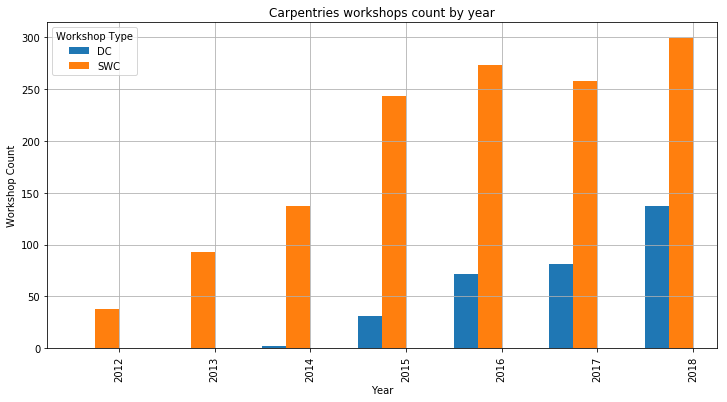

In [6]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Carpentries workshops count by year"
workshops_by_carpentry_year_with_projections.plot(y = ["DC", "SWC"], kind='bar', ax=ax, width=width, position=1, title=title)
ax.grid(True)

ax.set_xlabel("Year")
ax.set_ylabel("Workshop Count")

plt.show()

### Geographic reach 


The Carpentries began in predominantly white, English speaking countries.  In later years, it expanded to other European countries, and most recently expanded reach to include African and Latin American countries. A list of all countries ever having hosted a Carpentries workshop can be found in Table 2 of the Appendix.

In many countries, we have seen a steady increase in the number of workshops run. In several countries though (including Australia, Canada, and New Zealand), we have seen a decline in the number of workshops run. This may be due to the reasons cited above, including unreported self-organized workshops or an increase in variations on Carpentries workshops.  In either case this is a motivation for The Carpentries to improve data collection and methods to understand our scope of work beyond our centrally coordinated workshops.

Decreases in the number of workshops run in some countries may also be accounted for by shifts in our instructor community.  Carpentries activity is sustained by our instructors. Some instructors may move to new geographies or to new career phases. Without a larger community in place, these geographies may not have had the capacity to sustain their activity.  This is a motivation for The Carpentries to build strong and sustainable communities, with systems that account for individual turnover.

Table 2 in the appendix shows each country having hosted a workshop with the number of workshops each year from 2012 to 2018.  This data is used to plot the countries having hosted 10 or more workshops since 2012 as well as year each country held its first workshop below.


In [7]:
workshops_by_country_year = workshops_nonTTT.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year = workshops_by_country_year.fillna(0)
workshops_by_country_year.rename(columns={2018: '2018Q1'}, inplace=True)
# workshops_by_country_year['total'] = workshops_by_country_year.sum(axis=1)
workshops_by_country_year = workshops_by_country_year.astype(int)
workshops_by_country_year.columns.names = ['Year']

In [8]:
# Get all workshops for 2017
workshops_2017 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2017)]

# # Get all workshops for 2017 Q1
workshops_2017Q1 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2017) & (workshops_nonTTT['start_date'].dt.month <= 3)]

# # Get all workshops for 2018 Q1
workshops_2018Q1 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2018) & (workshops_nonTTT['start_date'].dt.month <= 3)]

# 2017 Q1 workshops by country
workshops_by_country_year_2017Q1 = workshops_2017Q1.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2017Q1.rename(columns={2017:'2017Q1'}, inplace=True)

# 2018 Q1 workshops by country
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)

# 2017 workshops by country
workshops_by_country_year_2017 = workshops_2017.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()

# Concatenated table, 2017 Q1 and 2018 Q1 workshops by country
workshops_by_country_year_1718Q1 = pd.concat([workshops_by_country_year_2017Q1, workshops_by_country_year_2018Q1, workshops_by_country_year_2017], axis=1)

# Add column to show what percent of 2017 workshops took place in 2017 Q1
workshops_by_country_year_1718Q1['prop2017Q1'] = workshops_by_country_year_1718Q1['2017Q1']/workshops_by_country_year_1718Q1[2017]

# Add column to show expected 2018 workshops, if rate is same as 2017
workshops_by_country_year_1718Q1['proj2018'] =  workshops_by_country_year_1718Q1['2018Q1']/workshops_by_country_year_1718Q1['prop2017Q1']

# Give df a better name
workshops_by_country_year_with_projections = workshops_by_country_year_1718Q1

# # Relying only on 2017 projections excludes countries that held a workshop in 2018 Q1 but not 2017 Q1
# # Adjust the 2018 projections to be the max of the 2018 projection or the 2018 Q1 actual
workshops_by_country_year_with_projections["adj_proj2018"] = workshops_by_country_year_with_projections[["proj2018", "2018Q1"]].max(axis=1)


# # Fill NA with 0 and cast floats as ints
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.fillna(0)
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.astype(int)


workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.reset_index()
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.rename(columns={'index':'country'})

# Table used to calculate 2018 projections - uncomment next line to hide/show
# workshops_by_country_year_with_projections


In [9]:
# All countries that have held at least 10 workshops (lifetime)

workshops_by_country_year_many = workshops_by_country_year[workshops_by_country_year.sum(axis=1) >= 10]
workshops_by_country_year_many = workshops_by_country_year_many.reset_index()

# Join table of countries with at least 10 workshops with 2018 projections

workshops_by_country_year_top = pd.merge(workshops_by_country_year_many, workshops_by_country_year_with_projections, on='country', how='left')
workshops_by_country_year_top = workshops_by_country_year_top[['country', 2012, 2013, 2014, 2015, 2016, '2017_x', 'adj_proj2018']]
workshops_by_country_year_top = workshops_by_country_year_top.rename(columns={'2017_x':2017, 'adj_proj2018':2018})

workshops_by_country_year_top = workshops_by_country_year_top.fillna(0)
workshops_by_country_year_top[2018] = workshops_by_country_year_top[2018].astype(int)
workshops_by_country_year_top.columns.names = ['Year']





### Figure 2: Countries hosting 10 or more workshops
This bar chart looks only at countries that have hosted 10 or more workshops since 2012.  For each country, the number of workshops run each year is plotted.  Data for 2018 is a projection.  Source data can be found in Table 3 in the Appendix.

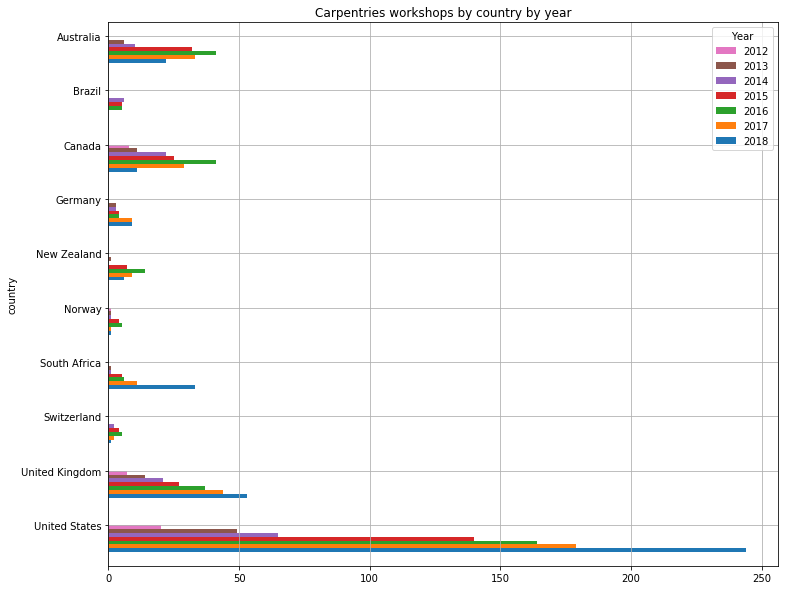

In [10]:
# Draw bar chart showing most active countries and workshops by year# Draw b 

workshops_by_country_year_top = workshops_by_country_year_top[::-1]
workshops_by_country_year_top = workshops_by_country_year_top.set_index('country')

fig = plt.figure(figsize=(12, 10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries workshops by country by year"
workshops_by_country_year_top.plot(y = list(workshops_by_country_year_top)[::-1], kind='barh', ax=ax, position=1, title=title)

ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Year', loc='upper right')

plt.show()

# workshops_by_country_year_top

### Figure 3: Countries hosting first workshop each year


The map below shows each country that has hosted a Carpentries workshop, noting the year they hosted their first workshop. Darker colors represent countries with first workshops in more recent years.  This shows Carpentries origin in Australia, Canada, the United States, and western Europe, with increased workshops in Africa in recent years.

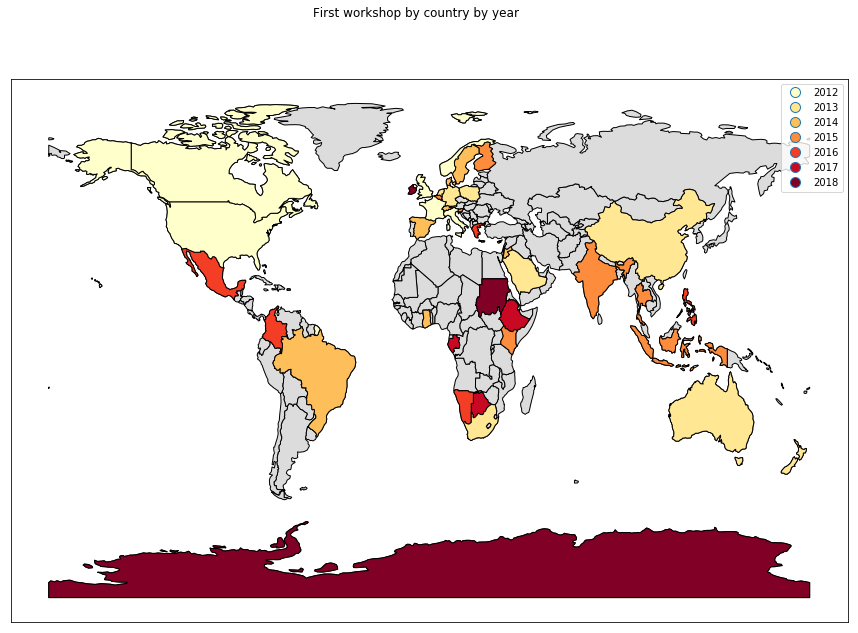

In [11]:


# When did each country have its first workshop?

w2 = workshops_by_country_year.copy()

# See https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns
# and
# https://stackoverflow.com/questions/38467749/find-first-non-zero-value-in-each-row-of-pandas-dataframe

# Fill zero values with Nan to make them non valid values
res = w2[w2 != 0.0]
first_workshop = res.apply(pd.Series.first_valid_index, axis=1)

# Create a new data frame with columns for year and country
first_workshop = pd.DataFrame({'year': first_workshop.values.astype(str), 'country': first_workshop.index.values}, index=None)

# Sort this by year
first_workshop.sort_values(by='year', inplace=True)

# Change "2018Q1" to 2018
first_workshop.replace('2018Q1', 2018, inplace=True)

# Make all values ints
first_workshop.year = first_workshop.year.astype(int)
# first_workshop

# Make country a column, not index
# first_workshop.reset_index(inplace=True)


# Rename column "country" to "name" to be able to merge with geodata
first_workshop.rename(columns={'country':'name'}, inplace=True)

# Merge first_workshop df and geodata df to a df used for map
first_wkshp_map = pd.merge(world, first_workshop, on='name', how='left')

# Create map canvas
fig, ax = plt.subplots(figsize=(15,10))


# Fill NAs with Zero so map can read
first_wkshp_map.fillna(0, inplace=True)

# Drop the zero values so they are not in the legend or color scale
first_wkshp_map = first_wkshp_map[(first_wkshp_map.year != 0)]

fig.suptitle('First workshop by country by year')

# Years as ints, not floats
first_wkshp_map['year'] = first_wkshp_map['year'] .astype(int) 

# Plot basemap all in gray
world.plot(ax=ax, color='#DCDCDC', edgecolor='black')


# Overlay plot of countries in color scale
first_wkshp_map.plot(ax=ax, column='year', categorical=True, legend=True, cmap="YlOrRd", edgecolor = 'black')

# Drop x & y axis ticks
plt.xticks([], [])
plt.yticks([], [])


plt.show()



### Unique countries hosting a workshop each year

From 2015 - 2017, The Carpentries saw remarkable growth in the number of countries running Carpentries workshops for the first time.  However, many of these countries did not have sustainable communities allowing them to continue running workshops. While The Carpentries has held workshops in at total of 43 countries, 18 of these have held only one workshop. This is motivation for The Carpentries to look at building sustainable communities when working in new geographies.

In [12]:
unique_countries_by_year = pd.DataFrame(columns=['year', 'count', 'countries'])

# There is probably a more efficient way to do this
for i in workshops_by_country_year.columns.tolist():
#     print(i)
    countries_that_year = workshops_by_country_year.index[workshops_by_country_year[i] >=1].tolist()
    country_count_by_year = len(countries_that_year)
    cty = ", ".join(countries_that_year)
#     print(cty)
    unique_countries_by_year = unique_countries_by_year.append({'year':i, 'count':country_count_by_year, 'countries':cty}, ignore_index=True)

unique_countries_by_year.replace('2018Q1', 2018, inplace=True)
unique_countries_by_year['count'] = unique_countries_by_year['count'].astype(int)

# Make total column temporarily numeric so we can cast floats as ints, then make it back to str
unique_countries_by_year.replace('total', 9999, inplace=True)
unique_countries_by_year['year'] = unique_countries_by_year['year'].astype(int)
unique_countries_by_year.replace(9999, 'total', inplace=True)


### Figure 4: Number of unique countries hosting a workshop each year

This bar chart represents the number of unique countries running a workshop each year.  Table 5 in the Appendix includes a list of each country having held a workshop each year. Data from 2018 is actual data, not a projection.


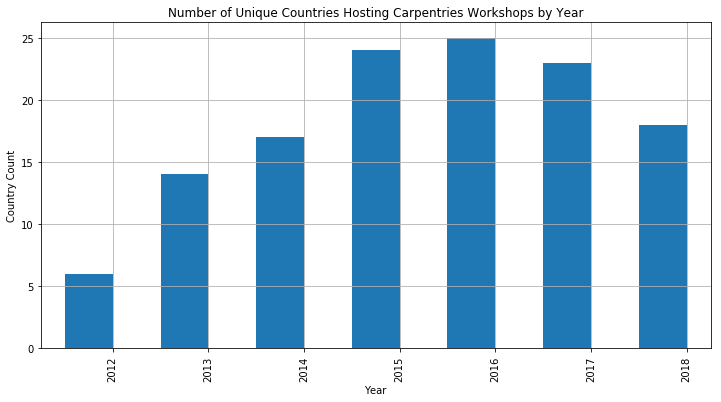

In [13]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Number of Unique Countries Hosting Carpentries Workshops by Year"

unique_countries_by_year.plot(y = ['count'], x="year", kind='bar', ax=ax, width=width, position=1, title=title, legend=False)

ax.grid(True)

ax.set_xlabel("Year")
ax.set_ylabel("Country Count")

plt.show()

### Workshop Attendance

In addition to looking at how many workshops we have run, we look at how many people we have impacted through our workshops.  Workshop specific attendance data can be found in the Programmatic Assessment folder of The Carpentries Assessment repository on github (https://github.com/carpentries/assessment/tree/master/programmatic-assessment ).

After running a workshop, The Carpentries staff ask hosts or instructors to submit attendance data to us.  In some cases, hosts and instructors provide a detailed account of the number registered and the number attended each day.  In other cases, they offer their best estimate of overall attendance.

This data allows us to demonstrate our impact by showing the number of learners who have been exposed to the  computational, coding, and data science skills taught by The Carpentries.  Further analysis of learner outcomes can be found in The Carpentries Learner Assessment report (https://github.com/carpentries/assessment/tree/master/learner-assessment ).


### Figure 5: Total attendance by Carpentry by year

This bar chart represents the total number of Software Carpentry (SWC) and Data Carpentry (DC) learners each year. 
Recent years show a drop in total number of learners served, which may be due to smaller class sizes as seen in the section below. Numbers for 2018 are a projection.

Source data can be found in Table 6 in the Appendix.


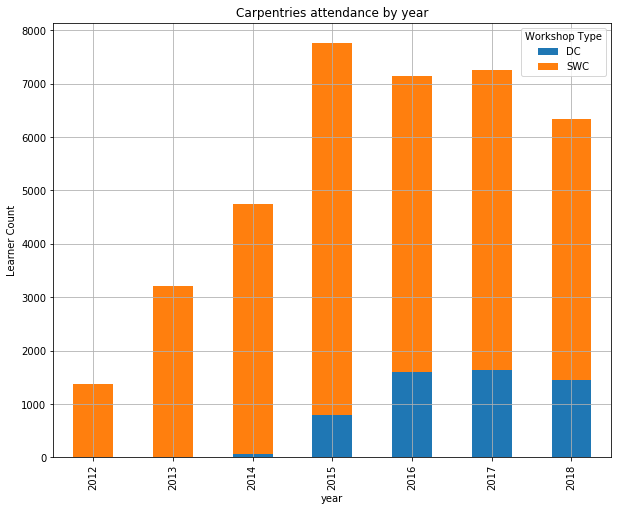

In [14]:

# Calculate projected attendance for 2018

# Total attendance for 2017
total2017 = workshops_2017['attendance'].sum(skipna=True)

# Total attendance for 2017 Q1
total2017Q1 = workshops_2017Q1['attendance'].sum(skipna=True)


# Total attendance for 2018 Q1
total2018Q1 = workshops_2018Q1['attendance'].sum(skipna=True)


proportion_attendance_2017Q1 = total2017Q1/total2017

projected_attendance_2018 = total2018Q1/proportion_attendance_2017Q1



attendance = workshops_nonTTT[['start_date', 'attendance', 'workshop_type']]   #df['date'].dt.year
attendance = attendance.assign(year=attendance['start_date'].dt.year)

# Doing the above like this gives a SettingWithCopyWarning error
# attendance['year'] = attendance['start_date'].dt.year
# See https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
total_attendance_by_year = attendance.groupby([ 'year', 'workshop_type'])['attendance'].sum().unstack()
total_attendance_by_year.loc[2018] = total_attendance_by_year.loc[2018] / proportion_attendance_2017Q1


total_attendance_by_year.fillna(0, inplace=True)
total_attendance_by_year = total_attendance_by_year.astype(int)
total_attendance_by_year.columns.names = ['Workshop Type']

fig = plt.figure(figsize=(10, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries attendance by year"
total_attendance_by_year.plot( kind='bar', ax=ax, title=title, legend=True, stacked=True)

ax.grid(True)

ax.set_ylabel("Learner Count")


plt.show()



### Class size

The Carpentries has historically recommended (but not enforced) a class size of no more than 40 learners with two instructors.  In early years, we saw more workshops closer to the upper limit, with many extreme outliers. The Carpentries experimented with class sizes more than twice our recommendation. In recent years, the mean and median class sizes have dropped, with fewer extreme outliers. This trend towards smaller class sizes with fewer extremes is driven by workshop hosts and instructors, rather than being mandated by The Carpentries. Our instructors experimented with large class sizes, and found that that this was not an ideal classroom environment.  

Our curriculum and lessons are designed to be hands on, engaging, and interactive.  This kind of environment is difficult to manage with larger class. The downward trend in class sizes shows that our hosts and instructors appreciate the importance in maintaining this kind of environment.

The average class size over the past few years has been 23-24 learners.  This may indicate that we should update our official recommendation, as our community is able to experiment and learn what works best in the field.

Actual class size for each workshop can be found in the Programmatic Assessment folder of The Carpentries Assessment repository on GitHub (https://github.com/carpentries/assessment/tree/master/programmatic-assessment ).

### Figure 6: Class size by year.  
This box plot shows the frequency of class sizes by year.  The lower and upper ends of each box represent bounds of the 2nd and 3rd quartiles, while the lower and upper tails represent the bounds of the 1st and 4th quartiles.  The center line of each box represents the median, and the center dot of each box represents the mean.  Outliers are represented by dots outside the tails of each plot.

Data from 2018 is based on actual first quarter data, not a projection for the year.

Summary data can be found in Table 7 in the Appendix.


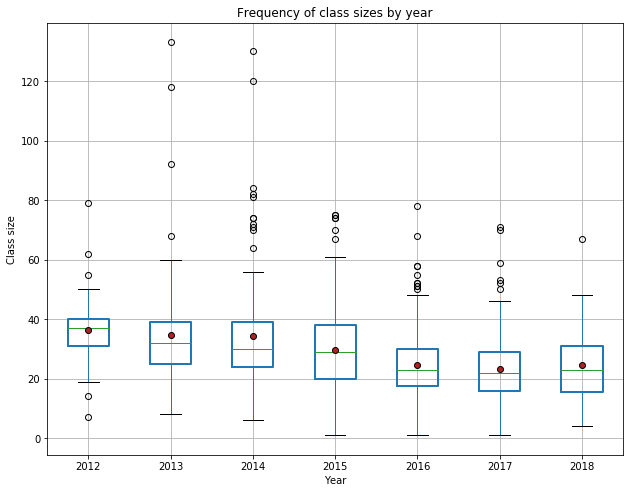

In [15]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

title = "Frequency of class sizes by year"

has_attendance = attendance[pd.notnull(attendance['attendance'])]

meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='firebrick')
boxprops = dict(linestyle='-', linewidth=2, color='k')

ax = has_attendance.boxplot(by="year", figsize=(10,8), showmeans = True, meanprops = meanprops, boxprops = boxprops)
ax.set_title(title)
ax.get_figure().suptitle("")
ax.set_xlabel("Year")
ax.set_ylabel("Class size")
plt.show()

## Part 2: Instructor Training


### Overview 

Over the last hundred years, researchers have discovered an enormous amount about how people learn and how best to teach them. Unfortunately, much of that knowledge has not yet been translated into common classroom practice, especially at the university level. To this goal, we offer an Instructor Training program.

This two-day class has the following overall goals:

* Introduce trainees to evidence-based best-practices of teaching.
* Teach how to create a positive environment for learners at Carpentries workshops.
* Provide opportunities for trainees to practice and build your teaching skills.
* Help trainees become integrated into the Carpentry community.
* Prepare trainees to use these teaching skills in teaching Carpentry workshops.

Because we have only two days, some things are beyond the scope of this class. We do not teach:

* How to program in R or Python, use git, or any of the other topics taught in Carpentry workshops.
* How to create lessons from scratch (although trainees will have a good start on the principles behind that sort of work if inspired to learn more).

This training is based on our constantly revised and updated curriculum (https://carpentries.github.io/instructor-training/ ).

The analyses below exclude data from 2018 Q1.  Trainees have 90 days to complete their certification requirements, so no one who attended instructor training in 2018 Q1 would be expected to have completed certification.

For each of our instructor training events, we collected the following data:

| variable | definition |
| -------- | ----------- | 
| slug | Unique identifier for each workshop. Takes the form `YYYY-MM-DD-sitename`. |
| start | Start date of the workshop. Takes the form `YYYY-MM-DD`. |
| country | The country in which the workshop was held. Online events are noted as "online" even if all participants were in one country. |
| attendance | Number of trainees at the workshop. | 
| count_badged | Number of trainees awarded a Software Carpentry (SWC) or Data Carpentry (DC) badge. * |
| pct_completion | Percent of trainees awarded a Software Carpentry (SWC) or Data Carpentry (DC) badge. * |



Until 2015, all Instructor Training events were run by one person, and were exclusively online.  After starting the  Trainers training program, we now have trainers across the globe who can run  online events across timezones and inperson events as needed both at their home institutions and traveling as needed.

Since 2012, The Carpentries has run 135 instructor training events.  This includes in person events in Australia, Canada, Netherlands, New Zealand, Norway, Poland, Puerto Rico**, South Africa, Switzerland, United Kingdom, and United States. It also includes 69 online events, allowing us to reach new instructors in many other countries.

\* While we grant both Software Carpentry and Data Carpentry badges we do not distinguish between them for teaching eligibility or any other status within The Carpentries.


\** While Puerto Rico is a United States Territory, it is separated out here for the purposes of demonstrating our global reach.

Table 8 in the Appendix lists all Instructor Training events, including total attendance and total badged from each event.

### Figure 7: Online and  and inperson events

This bar chart shows the number of online and in person training events run each year.  Data for 2018 represents actual, not projected, data.  Source data can be found in Table 9 in the Appendix.  Table 10 in the Appendix shows which country in-person events took place in.

In [16]:
badges_by_training_event = pd.read_csv("data_files/badges_by_training_event.csv")



badges_by_training_event['pct_completion'] = badges_by_training_event['count_badged'] / badges_by_training_event['attendance'] * 100
badges_by_training_event = badges_by_training_event.round({'pct_completion':1})
badges_by_training_event['start'] = pd.to_datetime(badges_by_training_event['start'])

badges_by_training_event_thru2017 = badges_by_training_event[badges_by_training_event['start'].dt.year < 2018]


badges_by_training_event['country'] = badges_by_training_event['country'].apply(get_country_name)

badges_by_training_event['start'] = pd.to_datetime(badges_by_training_event['start'])


badges_by_training_event_thru2017 = badges_by_training_event[badges_by_training_event['start'].dt.year < 2018]

# badges_by_training_event


In [17]:
trainings_by_country = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()
# trainings_by_country['total'] = trainings_by_country.sum(axis=1)
trainings_by_country.index.values
# trainings_by_country = trainings_by_country.rename(index = {2018:'2018Q1'})
trainings_by_country = trainings_by_country.fillna(0)
trainings_by_country = trainings_by_country.astype(int)

trainings_by_country.index.names = ['year']


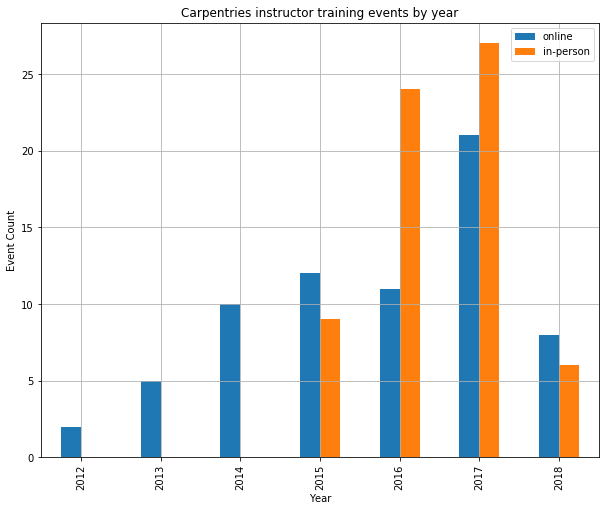

In [18]:
countries = list(trainings_by_country)
countries.remove('online')
# countries.remove('total')
inperson_trainings = trainings_by_country[countries].sum(axis = 1).to_frame()

online_trainings = trainings_by_country[['online']]

trainings_online_inperson = pd.concat([online_trainings, inperson_trainings], axis=1)

trainings_online_inperson.rename(columns = {0:'in-person'}, inplace=True)

trainings_online_inperson.fillna(0, inplace=True)
trainings_online_inperson = trainings_online_inperson.astype(int)

trainings_online_inperson.index.names = ['year']

# trainings_online_inperson

fig = plt.figure(figsize=(10, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries instructor training events by year"
ax = trainings_online_inperson[['online', 'in-person']].plot(kind='bar', ax=ax, stacked=False, title=title)
ax.grid(True)

ax.set_ylabel("Event Count")
ax.set_xlabel("Year")


plt.show()


### Figure 8: Completion rates by year


This box plot shows the frequency of class sizes by year.  The lower and upper ends of each box represent bounds of the 2nd and 3rd quartiles, while the lower and upper tails represent the bounds of the 1st and 4th quartiles.  The center line of each box represents the median, and the center dot of each box represents the mean.  Outliers are represented by dots outside the tails of each plot.

Data from 2018 is excludes.  As noted above, trainees from 2018 would not be expected to complete certification reqirements within the first quarter.  Summary data can be found in Table 11 in the Appendix.

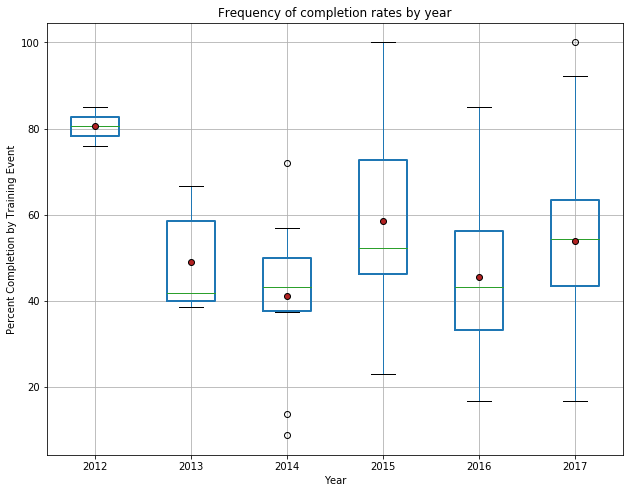

In [19]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

title = "Frequency of completion rates by year"

bbp = badges_by_training_event_thru2017[['start', 'pct_completion']]
bbp = bbp.assign(year=bbp['start'].dt.year)
badges_by_training_event_thru2017 = badges_by_training_event_thru2017.assign(year=badges_by_training_event_thru2017['start'].dt.year)

meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='firebrick')
boxprops = dict(linestyle='-', linewidth=2, color='k')



ax = badges_by_training_event_thru2017.boxplot(by="year", column='pct_completion', figsize=(10,8), showmeans = True, meanprops = meanprops, boxprops = boxprops)
ax.set_title(title)
ax.get_figure().suptitle("")
ax.set_xlabel("Year")
ax.set_ylabel("Percent Completion by Training Event")
plt.show()

In [20]:
# Keeping this plot out for now; will revisit for next report

# fig = plt.figure(figsize=(12, 12)) # Create matplotlib figure

# ax = fig.add_subplot(111) # Create matplotlib axes

# # Set colors to distinguish online/inperson events
# x = list(badges_by_training_event_thru2017.country.unique())
# color_dict = {}
# for i in x:
#     color_dict[i] = 'orange'
# color_dict['online'] = 'blue'

# col = badges_by_training_event_thru2017['country'].map(color_dict)

# # set dot size - multiple of attendance.  How should this actually be scaled?
# dotsize = badges_by_training_event_thru2017['attendance'] * 10

# title = "Frequency of completion rates by year"
# badges_by_training_event_thru2017.plot( x='year', y = 'pct_completion', 
#                                        kind='scatter', ax=ax, title=title, 
#                                        c=col, edgecolors = 'gray', s= dotsize, alpha = 0.5, 
#                                        legend=True
#                                        )
# ax.grid(True)

# ax.set_xlabel("Year")
# ax.set_ylabel("Percent Completion by Training Event")



# plt.show()


### Teaching rates

We continued to look at progress from going through instructor training to completing certification and getting badged on to when instructors taught their first workshop.  All dates are expressed as the first of the month. Exact dates are masked to preserve anonymity.

For each certified instructor, we collected the following data:

| variable | definition |
| -------- | ----------- | 
| date_awarded | The first day of the month the badge was awarded.  |
| first_wkshp | The first day of the month this instructor taught their first workshop. |
| days | A calculated field representing the difference between these two dates. |

The Carpentries requires that all centrally organized workshops are taught by certified Carpentries instructors. However, self organized workshops may be taught by one certified instructor who works with a peer or colleague as a co-instructors.  Many of these people go on to complete our instructor training program and become certified instructors themselves, which is why we see some people teaching even years before their certification date.

The full data set can be found in the Programmatic Assessment folder of The Carpentries Assessment repository on github (https://github.com/carpentries/assessment/tree/master/programmatic-assessment ).


In [21]:
days_badge_to_teach = pd.read_csv("data_files/days_badge_to_teach.csv")


days_badge_to_teach['date_awarded'] = pd.to_datetime(days_badge_to_teach['date_awarded'])
days_badge_to_teach['first_wkshp'] = pd.to_datetime(days_badge_to_teach['first_wkshp'])
days_badge_to_teach['badge_year'] = days_badge_to_teach['date_awarded'].dt.year

days_badge_to_teach = days_badge_to_teach[days_badge_to_teach['badge_year'] < 2018]

# days_badge_to_teach

### Figure 9: Days to teach first workshop

In early years, many people were teaching Carpentries workshops before being badged because we did not have a formal badging process in place, or the oversight to ensure that instructors completed training and were badged before teaching.  

Consistently, nearly half of our instructors have been teaching before they were badged. This shows that many of our instructors are coming to us already connected to The Carpentries community, acting as co-instructors for self organized workshops. This connection and experience motivates them to complete the instructor training program and continue teaching Carpentries workshops.

This box plot shows the days between badging and teaching by year.  The lower and upper ends of each box represent bounds of the 2nd and 3rd quartiles, while the lower and upper tails represent the bounds of the 1st and 4th quartiles.  The center line of each box represents the median, and the center dot of each box represents the mean.  Outliers are represented by dots outside the tails of each plot.

Summary data can be found in Table 12 in the Appendix.

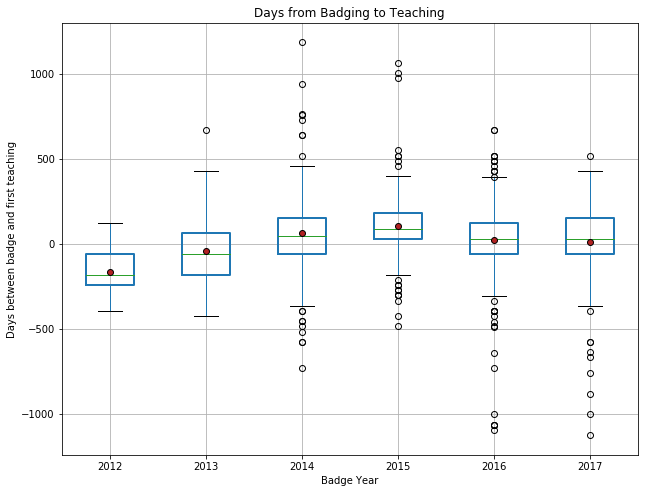

In [22]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

title = "Days from Badging to Teaching"

meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='firebrick')
boxprops = dict(linestyle='-', linewidth=2, color='k')


ax = days_badge_to_teach.boxplot(by="badge_year", column='days', figsize=(10,8), showmeans = True, meanprops = meanprops, boxprops = boxprops)

ax.set_title(title)
ax.get_figure().suptitle("")
ax.set_xlabel("Badge Year")
ax.set_ylabel("Days between badge and first teaching")
plt.show()
# days_badge_to_teach

In [23]:
num_workshops_taught = pd.read_csv("data_files/num_wkshps_taught.csv")
# num_workshops_taught[num_workshops_taught.num_taught == 1]


### Figure 10: Instructor teaching frequency

The bar chart below shows how many badged instructors have never taught, taught one workshop only, 2-5 workshops, 6-10 workshops, 11-15 workshops, 16-20 workshops, and 21 or more workshops. 

As of March 31, 2018, The Carpentries has 1480 badged instructors.  Of those who have taught at least once, the majority have taught between 2 and 5 workshops.  We also see 526 instructors (36%) who have never taught a workshop.  This does not account for how long they have been an instructor so it may include people who were badged as recently as late 2017, and have not yet had an opportunity to teach. Nonetheless, it is motivation for The Carpentries to explore why these instructors have never taught, and explore what we can do to ensure they are supported in finding and creating opportunities to teach.

Source data can be found in Table 13 in the Appendix.

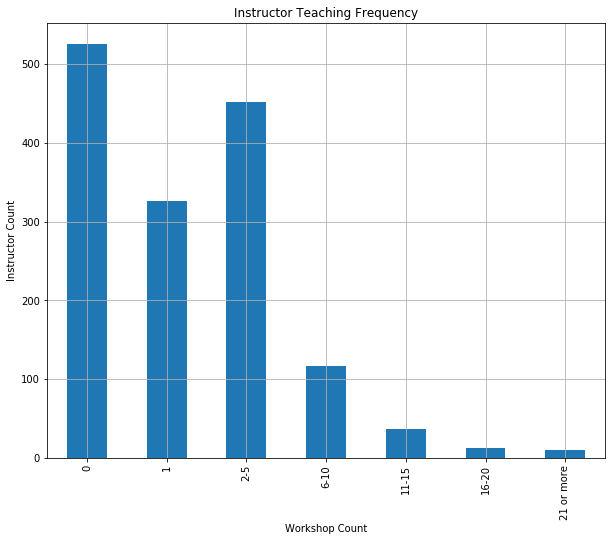

In [24]:
bins = pd.cut(num_workshops_taught['num_taught'], [-1, 0, 1, 5, 10, 15, 20, np.inf],)
num_workshops_taught_binned = num_workshops_taught.groupby(bins)['num_taught'].agg(['count'])

num_workshops_taught_binned = num_workshops_taught_binned.unstack().to_frame()

num_workshops_taught_binned.rename(columns={0:'count'}, inplace=True)

num_workshops_taught_binned.index.names = ["", 'workshops taught']


fig = plt.figure(figsize=(10, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes


title = "Instructor Teaching Frequency"

num_workshops_taught_binned.plot(kind='bar', ax=ax, title=title, legend=False, grid=True)
ax.set_ylabel("Instructor Count")
ax.set_xlabel("Workshop Count")
xticks = ['0', '1', '2-5', '6-10', '11-15', '16-20', '21 or more']
ax.set_xticklabels(xticks)
plt.show()



## Part 3: Trainers

### Instructor trainers

Until 2016, all Instructor Training events were run as online events by the Software Carpentry founder and former Executive Director.  Knowing the limitations of having only one Instructor Trainer, in 2016, The Carpentries launched a training program for Instructor Trainers.

This allowed us to expand reach by running several events a month, across timezones for online events.  It also allowed us to build capacity at member organizations who have onsite Instructor Trainers.  These Trainers run events for their site building a community of trained and certified instructors there. These trained and certified instructors also have onsite support to run workshops.

By brining on new Trainers in Europe and more recently in Africa, we have a large community of Trainers who overlap time zones and connect with a wider audience.  We've also expanded our geographic reach, allowing us to reach communities we may not otherwise connect with.  

It is due to our growing Trainer community that we are able to run more events, reach people across wider geographies, and bring on new instructors.  Another Trainers training event is planned for late 2018, and we anticipate the same growth rate in this community as we saw in 2017.

In [25]:
trainers = pd.read_csv("data_files/trainers.csv")
trainers['awarded'] = pd.to_datetime(trainers['awarded'])
trainers['country'] = trainers['country'].apply(get_country_name)

# Backwards way of fixing the NA/Namibia issue
trainers.replace('online', 'Namibia', inplace = True)
trainers = trainers.assign(year=trainers['awarded'].dt.year)

# trainers

In [26]:
trainers_by_country_year = trainers.groupby(['year', 'country']).id.count().unstack()
trainers_by_country_year.fillna(0, inplace=True)
trainers_by_country_year = trainers_by_country_year.astype(int)


### Figure 11: New Instructor Trainers by Year

We currently have 58 Instructor Trainers total. Numbers for 2018 represent actual, not projected data. Another round of Trainers training is expected in late 2018, adding 10-15 new Trainers to our community.  Source data can be found in Table 14 in the Appendix.

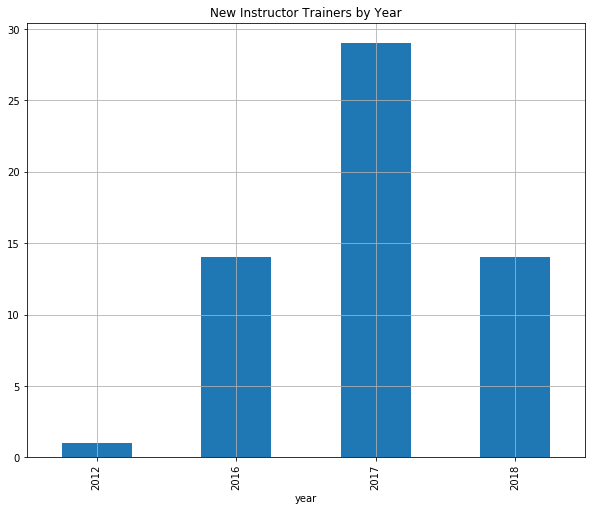

In [27]:
trainers_by_year = trainers.groupby(trainers['year']).id.count().to_frame()
trainers_by_year.rename(columns={'id':'count'}, inplace=True)
title = "New Instructor Trainers by Year"
trainers_by_year.plot(kind='bar', figsize=(10,8), title=title, legend=False, grid=True)
plt.show()



### Figure 12: Trainers by Country

The map below shows how many Instructor Trainers we have in each country. Through directed efforts of Carpentries staff and community members, we've seen significant growth in our Trainers community in Africa.  The Trainer count in South Africa is equal to countries like Canada, Australia, or New Zealand, even though we have a much shorter history in South Africa.  Source data can be found in Table 15 in the Appendix.


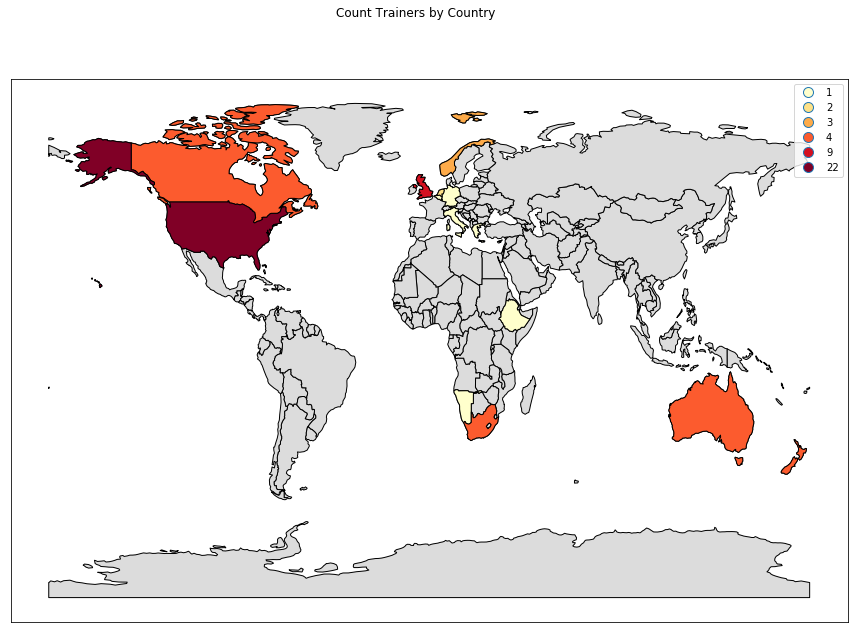

In [28]:
trainers_by_country = trainers.groupby(trainers['country']).id.count().to_frame()

trainers_by_country.reset_index(inplace=True)

trainers_by_country.rename(columns={'id': 'count'}, inplace=True)

trainers_by_country




# Rename column "country" to "name" to be able to merge with geodata
trainers_by_country.rename(columns={'country':'name'}, inplace=True)

trainers_map = pd.merge(world, trainers_by_country, on='name', how='left')

# Fill NAs with Zero so map can read
trainers_map.fillna(0, inplace=True)

# Drop the zero values so they are not in the legend or color scale
trainers_map = trainers_map[(trainers_map['count'] != 0)]

# Years as ints, not floats
trainers_map['count'] = trainers_map['count'].astype(int) 

# Drop the zero values so they are not in the legend or color scale
# first_wkshp_map = first_wkshp_map[(first_wkshp_map.year != 0)]

# #  Create map canvas
fig, ax = plt.subplots(figsize=(15,10))

fig.suptitle('Count Trainers by Country')
# # # Plot basemap all in gray
world.plot(ax=ax, color='#DCDCDC', edgecolor='black')



# # # Overlay plot of countries in color scale
trainers_map.plot(ax=ax, column='count', categorical=True, cmap="YlOrRd", legend=True, edgecolor = 'black',)

# # Drop x & y axis ticks
plt.xticks([], [])
plt.yticks([], [])

# plt.legend()
plt.show()


### Summary

In looking at data representing workshops, learners, instructors, and trainers from 2012 to the present we've seen meaningful growth in many areas.  In 2015, Data Carpentry grew from Software Carpentry's roots.  This was in recognition of the importance of data analysis skills, specifically knowing people in different domains interact with data in different ways.  With this experience, looking ahead we look forward to exploring integration of other Carpentries like Library Carpentry and HPC (High Performance Computing) Carpentry.

Along the way, we also grew our Instructor Training program from one to 58 trainers spread out across time zones and geographies.  This allows us to train and certify many more instructors than ever possible, engaging with new communities across the globe. At the same time, as we expand our global reach, we need to be sure we are building sustainable communities, so the Carpentries presence can grow and thrive beyond single isolated workshops.

In collecting and analyzing the data included in this report, we also have recognized gaps in our data.  This is motivation for The Carpentries to work with staff and other community members to ensure we have clear systems for collecting, sharing, and maintaining data.    

Future iterations of this report will also look at activity of other Carpentries communities.  This includes Lesson Maintainers who ensure lessons are up to date with pedagogical best practices as well as current technologies.  This also includes Mentors who ensure that new Trainees are supported in their journey to becoming Instructors and that new Instructors are equally supported as they begin teaching workshops.

Feedback on this report is welcome.  This can include reactions or new questions raised by information shared in this report; suggestions for other analyses or visualizations; code review; or any other comments.  Feedback can be shared via issues in this GitHub repo (https://github.com/carpentries/assessment ) or via email to team@carpentries.org.


## Appendix

### Table 1: Workshops by Carpentry by Year
This table shows the number of Data Carpentry (DC) and Software Carpentry (SWC) workshops each year. Data for 2018 is a projection.  The proportion of workshops in the first quarter of 2017 relative to the full year was applied to actual first quarter data from 2018.

In [29]:
add_totals(workshops_by_carpentry_year_with_projections)

Workshop Type,DC,SWC,row total
Year,,,
2012,0,38,38
2013,0,93,93
2014,2,137,139
2015,31,243,274
2016,72,273,345
2017,81,257,338
2018,137,299,436
column total,323,1340,1663


### Table 2: All countries hosting a Carpentries workshop
This table shows the number of Data Carpentry (DC) and Software Carpentry (SWC) workshops in each country each year.  For 2018, only actual data through March is represented, as most countries' data are too small to make meaningful predictions.

In [30]:
add_totals(workshops_by_country_year)

Year,2012,2013,2014,2015,2016,2017,2018Q1,row total
country,,,,,,,,
Antarctica,0,0,0,0,0,0,1,1
Australia,0,6,10,32,41,33,6,128
Belgium,0,0,0,1,0,1,0,2
Botswana,0,0,0,0,0,1,0,1
Brazil,0,0,6,5,5,0,0,16
Canada,8,11,22,25,41,29,4,140
China,0,1,0,0,0,0,0,1
Colombia,0,0,0,0,1,0,0,1
Cyprus,0,0,1,0,0,0,0,1


### Table 3: Countries hosting 10 or more workshops
This table shows the number of Carpentries workshops each year for countries having hosted more than 10 workshops since January 2012. This does not separate out between Data Carpentry and Software Carpentry.  For these countires, we have enough history to make projections for 2018. The proportion of workshops in the first quarter of 2017 relative to the full year was applied to actual first quarter data from 2018.

In [31]:
add_totals(workshops_by_country_year_top)

Year,2012,2013,2014,2015,2016,2017,2018,row total
country,,,,,,,,
United States,20,49,65,140,164,179,244,861
United Kingdom,7,14,21,27,37,44,53,203
Switzerland,0,0,2,4,5,2,1,14
South Africa,0,1,1,5,6,11,33,57
Norway,1,1,1,4,5,1,1,14
New Zealand,0,1,0,7,14,9,6,37
Germany,0,3,3,4,4,9,9,32
Canada,8,11,22,25,41,29,11,147
Brazil,0,0,6,5,5,0,0,16


### Table 4: List of countries that held their first workshop each year

This table lists each country that held its first workshop by year.

In [32]:
first_workshop.set_index('year')

,name
year,
2012,France
2012,United Kingdom
2012,United States
2012,Italy
2012,Canada
2012,Norway
2013,New Zealand
2013,Poland
2013,Saudi Arabia


### Table 5: Unique countries hosting workshops by year

This table lists every country that held a workshop that year.

In [33]:
unique_countries_by_year

,year,count,countries
0,2012,6,"Canada, France, Italy, Norway, United Kingdom, United States"
1,2013,14,"Australia, Canada, China, France, Germany, Lebanon, Netherlands, New Zealand, Norway, Poland, Saudi Arabia, South Africa, United Kingdom, United States"
2,2014,17,"Australia, Brazil, Canada, Cyprus, Denmark, Germany, Ghana, Italy, Jordan, Norway, Poland, South Africa, Spain, Sweden, Switzerland, United Kingdom, United States"
3,2015,24,"Australia, Belgium, Brazil, Canada, Finland, France, Germany, India, Indonesia, Kenya, Korea, Republic of, Netherlands, New Zealand, Norway, Poland, Slovenia, South Africa, Spain, Sweden, Switzerland, Thailand, United Kingdom, United States, Venezuela, Bolivarian Republic of"
4,2016,25,"Australia, Brazil, Canada, Colombia, Denmark, France, Germany, Greece, Italy, Kenya, Korea, Republic of, Mexico, Namibia, Netherlands, New Zealand, Norway, Philippines, Poland, Puerto Rico, South Africa, Spain, Sweden, Switzerland, United Kingdom, United States"
5,2017,23,"Australia, Belgium, Botswana, Canada, Denmark, Ethiopia, Gabon, Germany, Ghana, Mauritius, Mexico, Namibia, Netherlands, New Zealand, Norway, Poland, South Africa, Spain, Sweden, Switzerland, Thailand, United Kingdom, United States"
6,2018,18,"Antarctica, Australia, Canada, Denmark, Ethiopia, France, Germany, Ireland, Italy, Mexico, New Zealand, Norway, South Africa, Sudan, Sweden, Switzerland, United Kingdom, United States"


### Table 6: Total attendance by Carpentry by year

This table shows the total number of learners at Data Carpentry (DC) and Software Carpentry (SWC) workshops each year.  Numbers for 2018 are a projection.

In some cases, the hosts or instructors do not report back on attendance data. From 2012 through 2018 Q1, 122 of 1323 (about 9%) workshops were missing attendance.

For the analyses in this report, workshops missing attendance are excluded from the analyses. Because low attendance is a possible factor in not having reported attendance, replacing missing attendance data with means would not be an accurate reflection of our numbers.

In [34]:
add_totals(total_attendance_by_year)

Workshop Type,DC,SWC,row total
year,,,
2012,0,1378,1378
2013,0,3212,3212
2014,59,4683,4742
2015,790,6965,7755
2016,1604,5529,7133
2017,1630,5618,7248
2018,1459,4870,6329
column total,5542,32255,37797


### Table 7: Carpentries class size


For each year from 2012 to 2018 this shows the following:  


| variable | definition |
| -------- | ----------- | 
| count | Number of workshops that year |
| mean | Mean (average) attendance at each workshop |
| std | Standard deviation |
| min | Smallest class size |
| 25%, 50%, 75% | 1st, 2nd, and 3rd quartile class size |
| max | Largest class size |

In [35]:
has_attendance.groupby('year').describe().astype(int)

attendance
year                  
2012 count  38        
     mean   36        
     std    12        
     min    7         
     25%    31        
     50%    37        
     75%    40        
     max    79        
2013 count  93        
     mean   34        
     std    18        
     min    8         
     25%    25        
     50%    32        
     75%    39        
     max    133       
2014 count  138       
     mean   34        
     std    18        
     min    6         
     25%    24        
     50%    30        
     75%    39        
     max    130       
2015 count  262       
     mean   29        
     std    13        
     min    1         
     25%    20        
     50%    29        
     75%    38        
     max    75        
2016 count  291       
     mean   24        
     std    11        
     min    1         
     25%    17        
     50%    23        
     75%    30        
     max    78        
2017 count  313       
     mean   23        
     std    10        
     min    1         
     25%    16        
     50%    22        
     75%    29        
     max    71        
2018 count  71        
     mean   24        
     std    12        
     min    4         
     25%    15        
     50%    23        
     75%    31        
     max    67


### Table 8: Full table of all instructor training events

This table lists all instructor training events The Carpentries has held since 2012. The "count_badged" column is a total of all individuals from that event with at least one badge.  We are not distinguishing between Software Carpentry and Data Carpentry badges.

For reference, all training events through 2018 Q1 are listed here. However, the analyses in this report exclude data from 2018 Q1.  Trainees have 90 days to complete their certification requirements, so no one who attended instructor training in 2018 Q1 would be expected to have completed certification.


In [36]:
badges_by_training_event

,slug,start,country,attendance,count_badged,pct_completion
0,2012-08-26-ttt-online,2012-08-26,online,20,17,85.0
1,2012-10-11-ttt-online,2012-10-11,online,25,19,76.0
2,2013-01-06-ttt-online,2013-01-06,online,12,5,41.7
3,2013-03-12-ttt-online,2013-03-12,online,27,18,66.7
4,2013-05-12-ttt-online,2013-05-12,online,45,18,40.0
5,2013-08-12-ttt-online,2013-08-12,online,41,24,58.5
6,2013-09-30-ttt-online,2013-09-30,online,57,22,38.6
7,2014-01-16-ttt-online,2014-01-16,online,67,25,37.3
8,2014-04-14-ttt-pycon,2014-04-14,online,34,3,8.8
9,2014-04-24-ttt-online,2014-04-24,online,58,24,41.4


### Table 9: Online and  and inperson instructor training events


This table shows the total number of online and in-person training events each year.  Numbers for 2018 represent actual data, not a projection.

In [37]:
add_totals(trainings_online_inperson)

,online,in-person,row total
year,,,
2012,2,0,2
2013,5,0,5
2014,10,0,10
2015,12,9,21
2016,11,24,35
2017,21,27,48
2018,8,6,14
column total,69,66,135


### Table 10: Instructor Trainings by Country

This table lists all Instructor Training events held each year.  Events listed by country are in-person events.  All online events are listed as online, even if all trainees came from the same country.

In [38]:
add_totals(trainings_by_country)

country,Australia,Canada,Netherlands,New Zealand,Norway,Poland,Puerto Rico,South Africa,Switzerland,United Kingdom,United States,online,row total
year,,,,,,,,,,,,,
2012,0,0,0,0,0,0,0,0,0,0,0,2,2
2013,0,0,0,0,0,0,0,0,0,0,0,5,5
2014,0,0,0,0,0,0,0,0,0,0,0,10,10
2015,0,1,0,0,0,1,0,0,0,4,3,12,21
2016,2,1,0,3,1,0,0,1,1,3,12,11,35
2017,3,1,1,1,0,0,1,2,0,4,14,21,48
2018,1,1,0,0,0,0,0,1,0,0,3,8,14
column total,6,4,1,4,1,1,1,4,1,11,32,69,135


### Table 11: Completion rates by year



For each year from 2012 to 2017 this shows the following:  


| variable | definition |
| -------- | ----------- | 
| count | Number of training events that year |
| mean | Mean (average) completion rates |
| std | Standard deviation |
| min | Smallest completion rate |
| 25%, 50%, 75% | 1st, 2nd, and 3rd quartile completion rate |
| max | Largest completion rate |


In [39]:
badges_by_training_event_thru2017.loc['year'] = badges_by_training_event['start'].dt.year
#  df.drop([0, 1])
badges_by_training_event_thru2017.drop(['year'], inplace=True)
badges_by_training_event_thru2017['year'] = badges_by_training_event_thru2017['year'].astype(int)
badges_by_training_event_thru2017.groupby('year')['pct_completion'].describe().astype(int).to_frame()

pct_completion
year                      
2012 count  2             
     mean   80            
     std    6             
     min    76            
     25%    78            
     50%    80            
     75%    82            
     max    85            
2013 count  5             
     mean   49            
     std    12            
     min    38            
     25%    40            
     50%    41            
     75%    58            
     max    66            
2014 count  10            
     mean   41            
     std    18            
     min    8             
     25%    37            
     50%    43            
     75%    49            
     max    72            
2015 count  21            
     mean   58            
     std    21            
     min    23            
     25%    46            
     50%    52            
     75%    72            
     max    100           
2016 count  35            
     mean   45            
     std    18            
     min    16            
     25%    33            
     50%    43            
     75%    56            
     max    85            
2017 count  48            
     mean   53            
     std    18            
     min    16            
     25%    43            
     50%    54            
     75%    63            
     max    100

### Table 12: Days between badging and teaching

For each year from 2012 to 2018 this shows the following:  


| variable | definition |
| -------- | ----------- | 
| count | Number of instructors receiving a badge that year who have also taught at least one workshop |
| mean | Mean (average) number of days between receiving badge and first teaching experience |
| std | Standard deviation |
| min | Smallest number of days between badging and teaching |
| 25%, 50%, 75% | 1st, 2nd, and 3rd quartile number of days between badging and teaching |
| max | Largest number of days between badging and teaching |

In [40]:
days_badge_to_teach.groupby('badge_year').describe().astype(int)

days
badge_year            
2012       count  33  
           mean  -165 
           std    130 
           min   -396 
           25%   -244 
           50%   -183 
           75%   -61  
           max    121 
2013       count  65  
           mean  -40  
           std    197 
           min   -426 
           25%   -181 
           50%   -61  
           75%    62  
           max    669 
2014       count  144 
           mean   61  
           std    275 
           min   -730 
           25%   -61  
           50%    46  
           75%    153 
           max    1186
2015       count  150 
           mean   105 
           std    216 
           min   -485 
           25%    30  
           50%    90  
           75%    184 
           max    1065
2016       count  278 
           mean   20  
           std    244 
           min   -1096
           25%   -60  
           50%    31  
           75%    122 
           max    670 
2017       count  223 
           mean   8   
           std    216 
           min   -1127
           25%   -60  
           50%    31  
           75%    151 
           max    516

### Table 13: Instructor teaching frequency


The table below shows how many badged instructors have never taught, taught 1 workshop, 2-5 workshops, 6-10 workshops, 11-15 workshops, 16-20 workshops, and 21 or more workshops.  The left side of each bin is exclusive; the right side is inclusive.

In [41]:
num_workshops_taught_binned

count
      workshops taught       
count (-1, 0]           526  
      (0, 1]            326  
      (1, 5]            452  
      (5, 10]           116  
      (10, 15]          37   
      (15, 20]          13   
      (20, inf]         10

### Table 14: Instructor Trainers by year joined

The table below shows how many new Instructor Trainers joined each year.  Numbers for 2018 are actual data, not a projection.

In [42]:
trainers_by_year.append(trainers_by_year.sum(axis=0).rename("total"))

,count
year,
2012,1
2016,14
2017,29
2018,14
total,58


### Table 15: Trainers by Country

The table below lists how many Instructor Trainers we have in total in each country.

In [43]:
trainers_by_country


,name,count
0,Australia,4
1,Belgium,1
2,Canada,4
3,Ethiopia,1
4,Germany,1
5,Greece,1
6,Italy,1
7,Namibia,1
8,Netherlands,2
9,New Zealand,4


In [44]:
### Table 15: New Trainers by Country and Year

# The table below lists how many Instructor Trainers came on each year in each country.

# trainers_by_country_year

# Will try fixing this table to add totals later